In [1]:
%cd ..

/data/home/eak/learning/nganga_ai/imbizopm/ImbizoPM


# ImbizoPM Agents Test

This notebook demonstrates how to use the ImbizoPM agents to create and execute a project planning workflow.

In [2]:
from imbizopm_agents.graph import create_project_planning_graph, run_project_planning_graph
from IPython.display import display, Image
from langgraph.graph.graph import CompiledGraph

In [3]:
from langchain.chat_models import init_chat_model

llm = init_chat_model("ollama:cogito:32b")

In [4]:
# Create the project planning graph with checkpointing enabled
graph: CompiledGraph = create_project_planning_graph(llm, use_checkpointing=True)

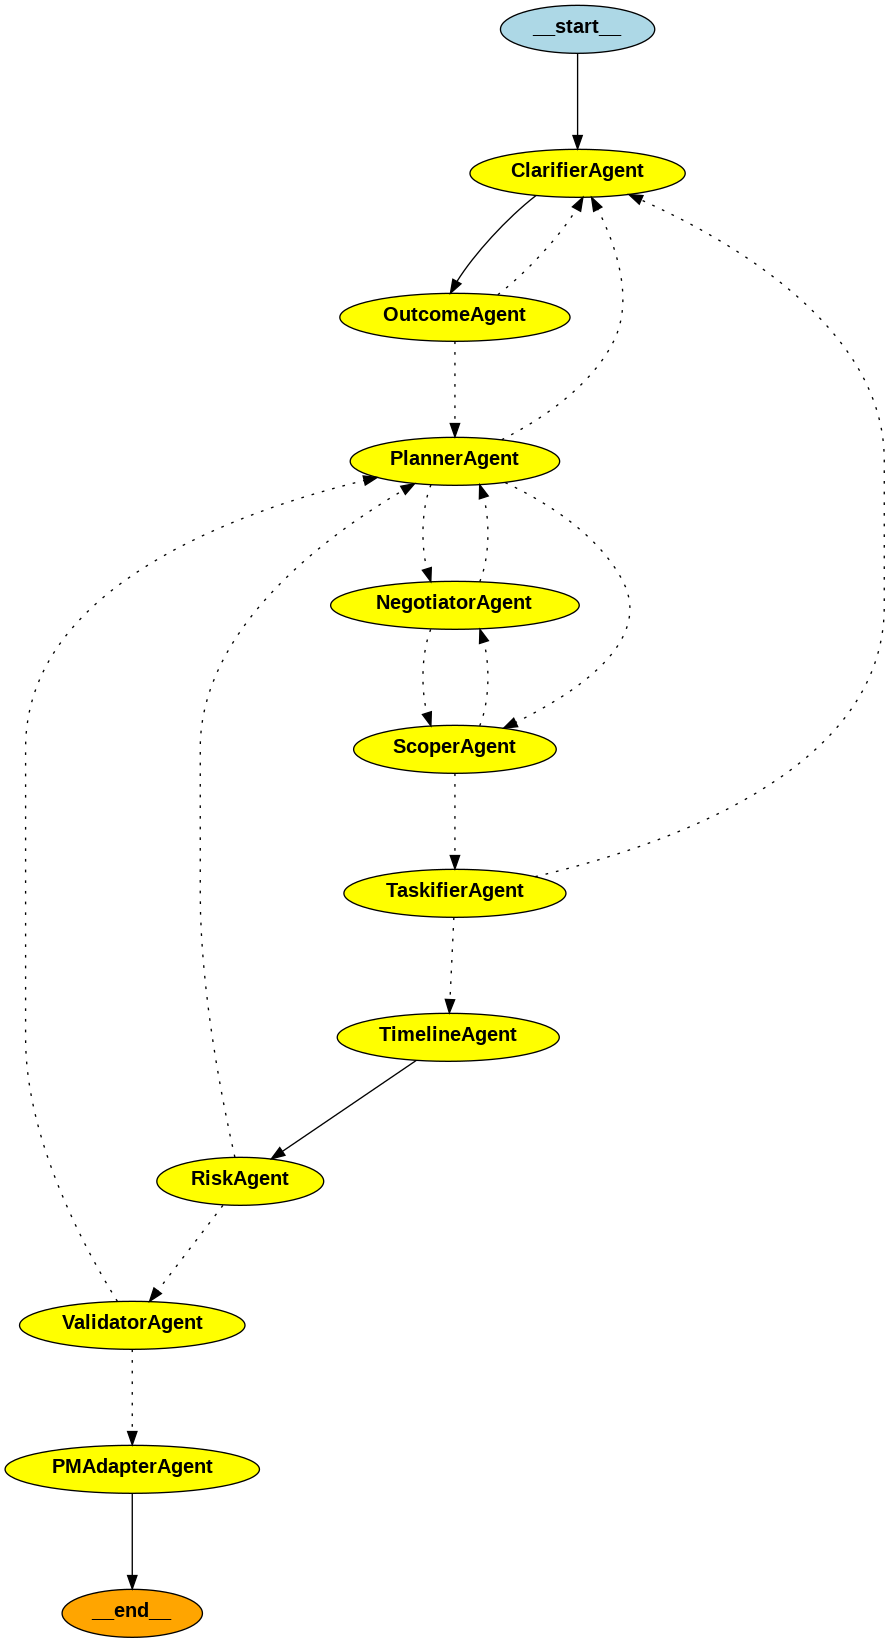

In [5]:
try:
    display(Image(graph.get_graph().draw_png()))
except Exception as e:
    print(f"Error creating graph: {e}")

## Running the Project Planning Process

We run the project planning graph with a sample input. The system will process the input through all the agents in the workflow and may request human assistance when needed.

In [6]:
PROJECT1 = """
Predict clinician responses to real-world clinical vignettes from rural Kenya, replicating expert nurse decision-making under low-resource healthcare constraints.
"""

PROJECT2 = """
AgentFlow is a Python library that automates the orchestration of multi-step agent workflows by integrating intelligent planning, routing, and execution of specialized operations.
"""

In [7]:
# Run the project planning process
results = run_project_planning_graph(
    graph,
    user_input=PROJECT1,
    thread_id="demo-run-1",  # Adding a unique thread ID for this run
    recursion_limit = 30
)

# Display the number of steps processed
print(f"Process completed with {len(results)} steps")

2025-04-10 06:05:39.979 | INFO     | imbizopm_agents.graph:run_project_planning_graph:127 - {'input': '\nPredict clinician responses to real-world clinical vignettes from rural Kenya, replicating expert nurse decision-making under low-resource healthcare constraints.\n', 'idea': {'original': '\nPredict clinician responses to real-world clinical vignettes from rural Kenya, replicating expert nurse decision-making under low-resource healthcare constraints.\n'}, 'goals': [], 'constraints': [], 'outcomes': [], 'deliverables': [], 'plan': {}, 'scope': {}, 'tasks': [], 'timeline': {}, 'risks': [], 'validation': {}, 'messages': [], 'next': 'ClarifierAgent'}
2025-04-10 06:05:39.980 | INFO     | imbizopm_agents.graph:run_project_planning_graph:128 - Next Direction: ClarifierAgent


2025-04-10 06:05:56.617 | INFO     | imbizopm_agents.graph:run_project_planning_graph:125 - ================================== Ai Message ==================================

{
    "refined_idea": "Develop a machine learning model that can predict clinical decision-making by expert nurses in rural Kenyan healthcare settings, specifically focusing on diagnosing and treating common conditions under resource-constrained circumstances.",

    "goals": [
        "Create a predictive algorithm that accurately mimics nurse decision-making with >85% accuracy compared to actual recorded decisions",
        "Identify key clinical factors that influence nursing decisions in low-resource environments",
        "Generate actionable insights for improving healthcare delivery in similar rural settings",
        "Develop an interpretable model that can explain its decision logic to healthcare professionals"
    ],

    "constraints": [
        "Data must be sourced from actual clinical records and obse

Process completed with 10 steps
